# The NumPy ndarray: A Multidimensional Array Object（ndarray: 多维数组对象）

In [1]:
import numpy as np

In [2]:
data = np.random.randn(2, 3)
data

array([[-0.33684602,  1.38376264, -0.83092539],
       [-1.92265288,  0.88846379,  2.41212159]])

In [3]:
data * 10

array([[ -3.3684602 ,  13.83762641,  -8.3092539 ],
       [-19.22652875,   8.88463788,  24.12121585]])

In [4]:
data + data

array([[-0.67369204,  2.76752528, -1.66185078],
       [-3.84530575,  1.77692758,  4.82424317]])

In [5]:
data.shape

(2, 3)

In [6]:
data.dtype

dtype('float64')

## 1 Greating ndarrays (创建n维数组)

In [7]:
data1 = [6, 7.5, 8, 9, 5, 10]
arr1 = np.array(data1)
arr1

array([  6. ,   7.5,   8. ,   9. ,   5. ,  10. ])

In [8]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [9]:
arr2.ndim

2

In [10]:
np.zeros(10)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [11]:
np.zeros((3, 6))

array([[ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.]])

In [12]:
np.ones((5,8))

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.]])

In [13]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

## 2 Data Types for ndarrays

In [14]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr.dtype

dtype('float64')

In [15]:
arr.astype(np.int32)

array([ 3, -1, -2,  0, 12, 10], dtype=int32)

In [16]:
# 还可以用astype把string里的数字变为实际的数字
numeric_strings = np.array(['1.25', '-9.6', '42'], dtype=np.string_)
numeric_strings

array([b'1.25', b'-9.6', b'42'],
      dtype='|S4')

In [17]:
numeric_strings.astype(float)

array([  1.25,  -9.6 ,  42.  ])

要十分注意numpy.string_类型，这种类型的长度是固定的，所以可能会直接截取部分输入而不给警告。

如果转换（casting）失败的话，会给出一个ValueError提示。

In [18]:
# 还可以利用类型的缩写，比如u4就代表unit32
empty_unit32 = np.empty(8, dtype='u4')
empty_unit32

array([         0,          0,  270487127, 2952790016,   90832898,
                1,   28019376,     131073], dtype=uint32)

## 3 Arithmetic with NumPy Arrays（数组计算）

数组之所以重要，是因为不用写for循环就能表达很多操作，这种特性叫做vectorization(向量化)。任何两个大小相等的数组之间的运算，都是element-wise（点对点）

In [19]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.]])

In [20]:
arr * arr

array([[  1.,   4.,   9.],
       [ 16.,  25.,  36.]])

In [21]:
arr - arr

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [22]:
arr + arr

array([[  2.,   4.,   6.],
       [  8.,  10.,  12.]])

In [23]:
1 / arr

array([[ 1.        ,  0.5       ,  0.33333333],
       [ 0.25      ,  0.2       ,  0.16666667]])

In [24]:
arr ** 2

array([[  1.,   4.,   9.],
       [ 16.,  25.,  36.]])

In [25]:
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])
arr2

array([[  0.,   4.,   1.],
       [  7.,   2.,  12.]])

In [26]:
arr2 > arr

array([[False,  True, False],
       [ True, False,  True]], dtype=bool)

## 4 Basic Indexing and Slicing（基本的索引和切片）

In [27]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [28]:
arr[5:8]

array([5, 6, 7])

In [29]:
arr[5:8] = 12

In [30]:
arr

array([ 0,  1,  2,  3,  4, 12, 12, 12,  8,  9])


这里把12赋给arr[5:8]，其实用到了broadcasted（我觉得应该翻译为广式转变）。这里有一个比较重要的概念需要区分，python内建的list与numpy的array有个明显的区别，这里array的切片后的结果只是一个views（视图），用来代表原有array对应的元素，而不是创建了一个新的array。但list里的切片是产生了一个新的list

In [31]:
arr_slice = arr[5:8]
arr_slice

array([12, 12, 12])

In [32]:
arr_slice[1] = 12345

In [33]:
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,     9])

In [34]:
arr_slice[:] = 64
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

之所以这样设计是出于性能和内存的考虑，毕竟如果总是复制数据的话，会很影响运算时间。当然如果想要复制，可以使用copy()方法，比如arr[5:8].copy()

In [35]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d[2]

array([7, 8, 9])

有两种方式可以访问单一元素

In [36]:
arr2d[0][2]

3

In [37]:
arr2d[0, 2]

3

In [38]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [39]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

In [40]:
old_values = arr3d[0].copy()

arr3d[0] = 42

arr3d

array([[[42, 42, 42],
        [42, 42, 42]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [41]:
arr3d[0] = old_values
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [42]:
arr3d[1, 0]

array([7, 8, 9])

In [43]:
arr2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [44]:
arr2d[:2, 1:] # 前两行，第二列之后

array([[2, 3],
       [5, 6]])

In [45]:
arr2d[:, :1]

array([[1],
       [4],
       [7]])

In [46]:
arr2d[:2, 1:] = 0
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

## 5 Boolean Indexing (布尔索引)

In [47]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'],
      dtype='<U4')

In [48]:
data = np.random.randn(7, 4)
data

array([[ 0.66083323,  2.05218044,  0.7433168 , -0.50170976],
       [ 0.37796185, -0.49409157, -0.50991339,  1.15379674],
       [-0.23572619, -0.70724757,  0.69638273, -1.56984729],
       [ 0.87329016,  0.18520991, -0.28249409,  0.12165417],
       [-0.65049415,  0.21064592,  1.05271494, -0.01575583],
       [ 0.52937923, -1.0018135 ,  0.17135931,  1.17251021],
       [-0.2429731 ,  0.09076562,  0.55079589, -2.1624073 ]])

假设每一个name对应data数组中的一行，我们想要选中name为'Bob'的所有行。就像四则运算，用比较运算符（==）

In [49]:
names == 'Bob'

array([ True, False, False,  True, False, False, False], dtype=bool)

In [50]:
data[names == 'Bob']

array([[ 0.66083323,  2.05218044,  0.7433168 , -0.50170976],
       [ 0.87329016,  0.18520991, -0.28249409,  0.12165417]])

注意：布尔数组和data数组的长度要一样。

我们可以选中names=='Bob'的行，然后索引列

In [51]:
data[names == 'Bob', 2:]

array([[ 0.7433168 , -0.50170976],
       [-0.28249409,  0.12165417]])

In [52]:
data[names == 'Bob', 3]

array([-0.50170976,  0.12165417])

选中除了'Bob'外的所有行，可以用!=或者~

In [53]:
names != 'Bob'

array([False,  True,  True, False,  True,  True,  True], dtype=bool)

In [54]:
data[~(names == 'Bob')]

array([[ 0.37796185, -0.49409157, -0.50991339,  1.15379674],
       [-0.23572619, -0.70724757,  0.69638273, -1.56984729],
       [-0.65049415,  0.21064592,  1.05271494, -0.01575583],
       [ 0.52937923, -1.0018135 ,  0.17135931,  1.17251021],
       [-0.2429731 ,  0.09076562,  0.55079589, -2.1624073 ]])

In [55]:
cond = names == 'Bob'
data[~cond]

array([[ 0.37796185, -0.49409157, -0.50991339,  1.15379674],
       [-0.23572619, -0.70724757,  0.69638273, -1.56984729],
       [-0.65049415,  0.21064592,  1.05271494, -0.01575583],
       [ 0.52937923, -1.0018135 ,  0.17135931,  1.17251021],
       [-0.2429731 ,  0.09076562,  0.55079589, -2.1624073 ]])

In [56]:
mask = (names == 'Bob') | (names == 'Will')
mask

array([ True, False,  True,  True,  True, False, False], dtype=bool)

In [57]:
data[mask]

array([[ 0.66083323,  2.05218044,  0.7433168 , -0.50170976],
       [-0.23572619, -0.70724757,  0.69638273, -1.56984729],
       [ 0.87329016,  0.18520991, -0.28249409,  0.12165417],
       [-0.65049415,  0.21064592,  1.05271494, -0.01575583]])

用布尔索引总是会返回一份新创建的数据，原本的数据不会被改变。

更改值的方式也很直觉。比如我们想让所有负数变为0

In [58]:
data[data < 0] = 0
data

array([[ 0.66083323,  2.05218044,  0.7433168 ,  0.        ],
       [ 0.37796185,  0.        ,  0.        ,  1.15379674],
       [ 0.        ,  0.        ,  0.69638273,  0.        ],
       [ 0.87329016,  0.18520991,  0.        ,  0.12165417],
       [ 0.        ,  0.21064592,  1.05271494,  0.        ],
       [ 0.52937923,  0.        ,  0.17135931,  1.17251021],
       [ 0.        ,  0.09076562,  0.55079589,  0.        ]])

In [59]:
data[names != 'Joe'] = 7
data

array([[ 7.        ,  7.        ,  7.        ,  7.        ],
       [ 0.37796185,  0.        ,  0.        ,  1.15379674],
       [ 7.        ,  7.        ,  7.        ,  7.        ],
       [ 7.        ,  7.        ,  7.        ,  7.        ],
       [ 7.        ,  7.        ,  7.        ,  7.        ],
       [ 0.52937923,  0.        ,  0.17135931,  1.17251021],
       [ 0.        ,  0.09076562,  0.55079589,  0.        ]])

## 6 Fancy Indexing(花式索引)

In [60]:
arr = np.zeros((8, 4))
arr

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

In [61]:
for i in range(8):
    arr[i] = i

In [62]:
arr

array([[ 0.,  0.,  0.,  0.],
       [ 1.,  1.,  1.,  1.],
       [ 2.,  2.,  2.,  2.],
       [ 3.,  3.,  3.,  3.],
       [ 4.,  4.,  4.,  4.],
       [ 5.,  5.,  5.,  5.],
       [ 6.,  6.,  6.,  6.],
       [ 7.,  7.,  7.,  7.]])

想要按一定顺序选出几行，可以用一个整数list或整数ndarray来指定顺序

In [63]:
arr[[0,6,1,7]]

array([[ 0.,  0.,  0.,  0.],
       [ 6.,  6.,  6.,  6.],
       [ 1.,  1.,  1.,  1.],
       [ 7.,  7.,  7.,  7.]])

In [64]:
arr[[-1,-7,-2,-8]]

array([[ 7.,  7.,  7.,  7.],
       [ 1.,  1.,  1.,  1.],
       [ 6.,  6.,  6.,  6.],
       [ 0.,  0.,  0.,  0.]])

In [65]:
arr = np.arange(32).reshape((8, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [66]:
arr[[1, 5, 6, 2], [0, 3, 1, 2]]

array([ 4, 23, 25, 10])

可以看到[ 4, 23, 29, 10]分别对应(1, 0), (5, 3), (7, 1), (2, 2)。不论数组有多少维，fancy indexing的结果总是一维。

对于长方形区域，有下面的方法来截取

In [67]:
arr[[1, 5, 6, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [24, 27, 25, 26],
       [ 8, 11,  9, 10]])

要记住，fancy indexing和切片不同，得到的是一个新的array。

## 7 Transposing Arrays and Swapping Axes（数组转置和轴交换）

转置也是返回一个view，而不是新建一个数组。有两种方式，一个是transpose方法，一个是T属性

In [68]:
arr = np.arange(15).reshape((3, 5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [69]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

做矩阵计算的时候，这个功能很常用，计算矩阵乘法的时候，用np.dot

In [70]:
arr = np.arange(8).reshape((4, 2))
print(arr.T)
print(arr)

[[0 2 4 6]
 [1 3 5 7]]
[[0 1]
 [2 3]
 [4 5]
 [6 7]]


In [71]:
np.dot(arr.T, arr)

array([[56, 68],
       [68, 84]])

上面的例子是 (2x4) x (4x2) = (2x2)。得到的结果是2x2维，就是普通的矩阵乘法。

对于多维数组，transpose会接受由轴数字组成的tuple，来交换轴

In [72]:
arr = np.arange(16).reshape((2, 2, 4))
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [73]:
arr.transpose((1, 0, 2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

这里，second axis(1)被设为第一个，first axis(0)第二个，最后的axis没变。

使用.T来转置swapping axes(交换轴)的一个特殊情况，ndarray有方法叫做swapaxes，这个方法取两个axis值，并交换这两个轴

In [74]:
arr.swapaxes(1, 2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

swapaxes也是返回view，不生成新的data。

# Universal Functions: Fast Element-Wise Array Functions（通用函数：快速点对点数组函数）

In [75]:
import numpy as np

In [76]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [77]:
np.sqrt(arr)

array([ 0.        ,  1.        ,  1.41421356,  1.73205081,  2.        ,
        2.23606798,  2.44948974,  2.64575131,  2.82842712,  3.        ])

In [78]:
np.exp(arr)

array([  1.00000000e+00,   2.71828183e+00,   7.38905610e+00,
         2.00855369e+01,   5.45981500e+01,   1.48413159e+02,
         4.03428793e+02,   1.09663316e+03,   2.98095799e+03,
         8.10308393e+03])

In [79]:
x = np.random.randn(8)
y = np.random.randn(8)

In [80]:
x

array([ 0.76580302,  1.10781413, -0.52875017,  0.76094857, -1.84523954,
       -0.32837587, -1.00262202, -1.49350736])

In [81]:
y

array([-0.76654251, -1.493294  , -0.87895609, -2.11552989,  1.77987188,
        0.99452262,  0.38667473,  0.68193202])

In [82]:
np.maximum(x, y)

array([ 0.76580302,  1.10781413, -0.52875017,  0.76094857,  1.77987188,
        0.99452262,  0.38667473,  0.68193202])

In [83]:
arr = np.random.randn(7) * 5
arr

array([-1.92513687, -1.64034527, -1.02927585,  6.16089853, -1.13292963,
       -3.51915965,  2.34995887])

In [84]:
remainder, whole_part = np.modf(arr)

In [85]:
remainder

array([-0.92513687, -0.64034527, -0.02927585,  0.16089853, -0.13292963,
       -0.51915965,  0.34995887])

In [86]:
whole_part

array([-1., -1., -1.,  6., -1., -3.,  2.])

In [87]:
np.abs(arr)

array([ 1.92513687,  1.64034527,  1.02927585,  6.16089853,  1.13292963,
        3.51915965,  2.34995887])

In [88]:
np.square(arr)

array([  3.70615198,   2.69073259,   1.05940877,  37.95667075,
         1.28352954,  12.38448461,   5.52230667])

In [89]:
np.sign(arr)

array([-1., -1., -1.,  1., -1., -1.,  1.])

In [90]:
np.rint(arr)

array([-2., -2., -1.,  6., -1., -4.,  2.])

# Array-Oriented Programming with Arrays（数组导向编程）

向量化的数组运算比纯python同等程度的运算要快很多。

一个简单的例子，假设我们想要评价函数sqrt(x^2 + y^2)。np.meshgrid函数取两个1维的数组，产生一个2维的矩阵，对应于所有两个数组中(x, y)的组合：

In [91]:
import numpy as np

meshgrid函数用两个坐标轴上的点在平面上画网格。用法：

[X,Y]=meshgrid(x,y)

[X,Y]=meshgrid(x)与[X,Y]=meshgrid(x,x)是等同的

[X,Y,Z]=meshgrid(x,y,z)生成三维数组，可用来计算三变量的函数和绘制三维立体图

这里，主要以[X,Y]=meshgrid(x,y)为例，来对该函数进行介绍。

[X,Y] = meshgrid(x,y) 将向量x和y定义的区域转换成矩阵X和Y,其中矩阵X的行向量是向量x的简单复制，而矩阵Y的列向量是向量y的简单复制(注：下面代码中X和Y均是数组，在文中统一称为矩阵了)。

假设x是长度为m的向量，y是长度为n的向量，则最终生成的矩阵X和Y的维度都是 nm （注意不是mn）。

In [92]:
m, n = (5, 3)
x = np.linspace(0, 1, m)
y = np.linspace(0, 1, n)
X, Y = np.meshgrid(x, y)

In [93]:
x

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ])

In [94]:
y

array([ 0. ,  0.5,  1. ])

In [95]:
X

array([[ 0.  ,  0.25,  0.5 ,  0.75,  1.  ],
       [ 0.  ,  0.25,  0.5 ,  0.75,  1.  ],
       [ 0.  ,  0.25,  0.5 ,  0.75,  1.  ]])

In [96]:
Y

array([[ 0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0.5,  0.5,  0.5,  0.5,  0.5],
       [ 1. ,  1. ,  1. ,  1. ,  1. ]])

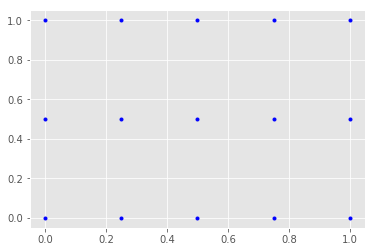

In [97]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

plt.plot(X, Y, marker='.', color='blue', linestyle='none')

In [98]:
z = [i for i in zip(X.flat, Y.flat)]
z

[(0.0, 0.0),
 (0.25, 0.0),
 (0.5, 0.0),
 (0.75, 0.0),
 (1.0, 0.0),
 (0.0, 0.5),
 (0.25, 0.5),
 (0.5, 0.5),
 (0.75, 0.5),
 (1.0, 0.5),
 (0.0, 1.0),
 (0.25, 1.0),
 (0.5, 1.0),
 (0.75, 1.0),
 (1.0, 1.0)]

In [99]:
points = np.arange(-5, 5, 0.01) # 1000 equally spaced points
xs, ys = np.meshgrid(points, points) # xs和ys是一样的
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ..., 
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [100]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[ 7.07106781,  7.06400028,  7.05693985, ...,  7.04988652,
         7.05693985,  7.06400028],
       [ 7.06400028,  7.05692568,  7.04985815, ...,  7.04279774,
         7.04985815,  7.05692568],
       [ 7.05693985,  7.04985815,  7.04278354, ...,  7.03571603,
         7.04278354,  7.04985815],
       ..., 
       [ 7.04988652,  7.04279774,  7.03571603, ...,  7.0286414 ,
         7.03571603,  7.04279774],
       [ 7.05693985,  7.04985815,  7.04278354, ...,  7.03571603,
         7.04278354,  7.04985815],
       [ 7.06400028,  7.05692568,  7.04985815, ...,  7.04279774,
         7.04985815,  7.05692568]])

Text(0.5,1,'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

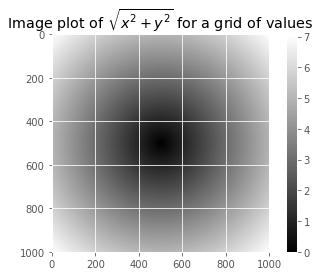

In [101]:
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

## 1 Expressing Conditional Logic as Array Operations (像数组操作一样表示逻辑条件)

numpy.where函数是一个向量版的三相表达式，x if condition else y。假设我们有一个布尔数组和两个数组：

In [102]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [103]:
result = [(x if c else y)
          for x, y, c in zip(xarr, yarr, cond)]

result

[1.1000000000000001, 2.2000000000000002, 1.3, 1.3999999999999999, 2.5]

In [104]:
result = np.where(cond, xarr, yarr)
result

array([ 1.1,  2.2,  1.3,  1.4,  2.5])

np.where中第二个和第三个参数不用必须是数组。where在数据分析中一个典型的用法是基于一个数组，产生一个新的数组值。假设我们有一个随机数字生成的矩阵，我们想要把所有的正数变为2，所有的负数变为-2。用where的话会非常简单：

In [105]:
arr = np.random.randn(4, 4)
arr

array([[ 1.05644339, -0.45632596, -0.86200975,  1.00744469],
       [ 2.08038629, -1.08737288,  1.32799586, -2.36866954],
       [-0.27806867, -0.57566321, -1.32259644,  0.67333158],
       [-0.61323112,  1.70660469,  0.11265689,  0.71858897]])

In [106]:
np.where(arr > 0, 2, -2)

array([[ 2, -2, -2,  2],
       [ 2, -2,  2, -2],
       [-2, -2, -2,  2],
       [-2,  2,  2,  2]])

In [107]:
np.where(arr > 0, 2, arr)

array([[ 2.        , -0.45632596, -0.86200975,  2.        ],
       [ 2.        , -1.08737288,  2.        , -2.36866954],
       [-0.27806867, -0.57566321, -1.32259644,  2.        ],
       [-0.61323112,  2.        ,  2.        ,  2.        ]])

## 2 Mathematical and Statistical Methods (数学和统计方法)

In [108]:
arr = np.random.randn(5, 4)
arr

array([[-1.17685834,  0.68000008,  0.29142847, -0.01951295],
       [-0.85871504, -0.37786609, -0.38039297, -0.09539781],
       [ 0.75481469,  0.31707976,  0.59226596,  0.21165696],
       [ 0.79656694,  1.52879018, -1.31527889,  0.36052982],
       [-1.38165764, -0.15680889, -1.60078271,  0.26115319]])

In [109]:
arr.mean()

-0.078449264429987259

In [110]:
np.mean(arr)

-0.078449264429987259

In [111]:
arr.sum()

-1.5689852885997451

In [112]:
arr.mean(axis=1)

array([-0.05623568, -0.42809298,  0.46895434,  0.34265201, -0.71952401])

In [113]:
arr.sum(axis=0)

array([-1.86584939,  1.99119504, -2.41276014,  0.71842921])

这里arr.mean(1)表示，compute mean acros the columns(计算各列之间的平均值)。arr.sum(0)表示，compute sum down the rows(计算各行总和)。

In [114]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28])

In [115]:
np.cumsum?

In [116]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [117]:
arr.cumsum(axis=0) # 沿着行加法

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]])

In [118]:
arr.cumprod(axis=1) # 沿着列乘法

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]])

## 3 Methods for Boolean Arrays（布尔数组的方法）

In [119]:
arr = np.random.randn(100)
(arr > 0).sum() # Number of positive values

52

有两个其他方法，any和all，对于布尔数组特别有用。any检测数组中只要有一个ture返回就是true，而all检测数组中都是true才会返回true。

In [120]:
bools = np.array([False, False, True, False])

In [121]:
bools.any()

True

In [122]:
bools.all()

False

## 4 Sorting（排序）

In [123]:
arr = np.random.randn(6)
arr

array([ 0.8827918 , -0.13183765, -0.80242119, -0.45397386,  1.28094003,
       -1.00954922])

In [124]:
arr.sort()

In [125]:
arr

array([-1.00954922, -0.80242119, -0.45397386, -0.13183765,  0.8827918 ,
        1.28094003])

In [128]:
arr = np.random.randn(5, 3)
arr

array([[ 0.02082728, -0.49940204,  0.64324714],
       [-0.52413202, -0.75744168, -0.27180365],
       [-0.16207418, -0.13425896, -0.00706515],
       [-2.31252599, -1.30189974,  2.1051898 ],
       [ 1.18210066, -0.54891914, -0.12060827]])

In [129]:
arr.sort(1)

In [130]:
arr

array([[-0.49940204,  0.02082728,  0.64324714],
       [-0.75744168, -0.52413202, -0.27180365],
       [-0.16207418, -0.13425896, -0.00706515],
       [-2.31252599, -1.30189974,  2.1051898 ],
       [-0.54891914, -0.12060827,  1.18210066]])

In [132]:
arr.sort(0)
arr

array([[-2.31252599, -1.30189974, -0.27180365],
       [-0.75744168, -0.52413202, -0.00706515],
       [-0.54891914, -0.13425896,  0.64324714],
       [-0.49940204, -0.12060827,  1.18210066],
       [-0.16207418,  0.02082728,  2.1051898 ]])

上面是直接调用数组的sort方法，会改变原有数组的顺序。但如果使用np.sort()函数的话，会生成一个新的排序后的结果。

## 5 Unique and Other Set Logic (单一性和其他集合逻辑)

In [133]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)

array(['Bob', 'Joe', 'Will'],
      dtype='<U4')

In [134]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

array([1, 2, 3, 4])

np.in1d, 测试一个数组的值是否在另一个数组里，返回一个布尔数组：

In [135]:
values = np.array([6, 0, 0, 3, 2, 5, 6])

In [136]:
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True], dtype=bool)

# Linear Algebra (线性代数)

在MATLAB里，* 代表矩阵乘法。但是在numpy里，*表示element-wise prodct。要想做到矩阵乘法，要用多函数dot:

In [1]:
import numpy as np

In [2]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])

y = np.array([[6., 23.], [-1, 7], [8, 9]])

In [3]:
x

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.]])

In [4]:
y

array([[  6.,  23.],
       [ -1.,   7.],
       [  8.,   9.]])

In [5]:
x.dot(y)

array([[  28.,   64.],
       [  67.,  181.]])

In [6]:
np.dot(x, y)

array([[  28.,   64.],
       [  67.,  181.]])

In [7]:
np.dot(x, np.ones(3))

array([  6.,  15.])

In [8]:
x @ np.ones(3)

array([  6.,  15.])

In [9]:
A = np.mat("0 1 2;1 0 3;4 -3 8")
A

matrix([[ 0,  1,  2],
        [ 1,  0,  3],
        [ 4, -3,  8]])

In [10]:
inv = np.linalg.inv(A)
inv

matrix([[-4.5,  7. , -1.5],
        [-2. ,  4. , -1. ],
        [ 1.5, -2. ,  0.5]])

In [11]:
A * inv

matrix([[ 1.,  0.,  0.],
        [ 0.,  1.,  0.],
        [ 0.,  0.,  1.]])

In [12]:
X = np.random.randn(5, 5)
X

array([[ 0.4835729 ,  0.61631618,  0.47135775, -0.06017494, -0.39738502],
       [ 0.14325746, -0.03946102, -0.10357756, -0.03750761,  0.68920502],
       [ 0.1554666 ,  0.49687777, -0.51990607,  0.71905599,  0.75123963],
       [-1.99542093, -0.18118974, -0.94976876, -0.30481524, -0.85547799],
       [-0.23024588,  0.78949091,  0.88372921,  1.39181218,  0.46835898]])

In [13]:
X = np.round(np.random.randn(5, 5), 3)
X

array([[-0.988,  0.466, -1.827, -0.391,  0.267],
       [ 1.363, -0.038,  0.549, -1.57 ,  0.901],
       [ 0.617,  0.227, -1.652, -1.355,  0.93 ],
       [-0.196,  2.38 ,  0.315, -0.651,  0.155],
       [ 0.37 ,  0.547,  1.054,  0.523, -0.179]])

# Pseudorandom Number Generation（伪随机数生成）

numpy.random模块提供了很多生成随机数的函数，可以选择生成符合某种概率分布的随机数。比如我们可以用normal得到一个4 x 4的，符合标准正态分布的数组：

In [1]:
import numpy as np
samples = np.random.normal(size=(4, 4))
samples

array([[-0.93877663, -0.50512123, -2.03350457,  0.55035522],
       [-0.78443856, -1.71150947, -0.0488719 , -1.30317396],
       [-0.67326317, -0.69801789, -0.70792886, -1.51328178],
       [ 3.02811796, -0.40275876,  0.22570531,  0.54925083]])

相对的，python内建的random模块一次只能生成一个样本。在生成大量样本方法，numpy.random是非常快的：

In [2]:
from random import normalvariate

N = 1000000

In [3]:
%timeit sample = [normalvariate(0, 1) for _ in range(N)]

1.11 s ± 14.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [4]:
%timeit np.random.normal(size=N)

42.2 ms ± 1.42 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


之所以称之为伪随机数，是因为随机数生成算法是根据seed来生成的。也就是说，只要seed设置一样，每次生成的随机数是相同的：

In [5]:
np.random.seed(1234)

当然，这个seed是全局的，如果想要避免全局状态，可以用numpy.random.RandomState来创建一个独立的生成器：

In [6]:
rng = np.random.RandomState(1234)

In [7]:
rng.randn(10)

array([ 0.47143516, -1.19097569,  1.43270697, -0.3126519 , -0.72058873,
        0.88716294,  0.85958841, -0.6365235 ,  0.01569637, -2.24268495])